In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from torch.utils.data import Dataset, DataLoader

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np

In [6]:
data = pd.read_csv("/Users/arsh/STAT-XAI/Datasets/Realworld/adult.csv")
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [8]:
print(data.shape)

(48842, 15)


In [10]:
data.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [12]:
data['workclass']=data['workclass'].replace('?',np.nan)
data['occupation']=data['occupation'].replace('?',np.nan)
data['native-country']=data['native-country'].replace('?',np.nan)

In [14]:
info = pd.DataFrame(data.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",data.isna().sum(),True)
info.insert(2,"Duplicate",data.duplicated().sum(),True)
info.insert(3,"Unique",data.nunique(),True)
info.insert(4,"Min",data.min(),True)
info.insert(5,"Max",data.max(),True)
info.T

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
IsNull,0,2799,0,0,0,0,2809,0,0,0,0,0,0,857,0
IsNa,0,2799,0,0,0,0,2809,0,0,0,0,0,0,857,0
Duplicate,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
Unique,74,8,28523,16,16,7,14,6,5,2,123,99,96,41,2
Min,17,NaN,12285,10th,1,Divorced,NaN,Husband,Amer-Indian-Eskimo,Female,0,0,1,NaN,<=50K
Max,90,NaN,1490400,Some-college,16,Widowed,NaN,Wife,White,Male,99999,4356,99,NaN,>50K


In [16]:
df = data.copy()

In [18]:
df.dropna(how='any',inplace=True)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [20]:
df = df.drop_duplicates()
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [22]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [24]:
df['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14,  3, 11,  5, 16,  8,  2,  1])

In [26]:
df1 = df.drop(['educational-num', 'capital-gain', 'capital-loss'], axis=1)

In [28]:
from sklearn import preprocessing

In [30]:
train_df, test_df = train_test_split(df1, test_size=0.2, random_state=123)
train_df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
27716,56,Federal-gov,155238,HS-grad,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,United-States,>50K
34819,36,Private,123983,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,55,Japan,>50K
6791,63,Local-gov,197189,Bachelors,Widowed,Prof-specialty,Not-in-family,White,Female,48,United-States,<=50K
30798,43,Self-emp-not-inc,32451,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,<=50K
19250,27,Private,85625,Some-college,Never-married,Sales,Not-in-family,White,Male,20,United-States,<=50K


In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36140 entries, 27716 to 17009
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             36140 non-null  int64 
 1   workclass       36140 non-null  object
 2   fnlwgt          36140 non-null  int64 
 3   education       36140 non-null  object
 4   marital-status  36140 non-null  object
 5   occupation      36140 non-null  object
 6   relationship    36140 non-null  object
 7   race            36140 non-null  object
 8   gender          36140 non-null  object
 9   hours-per-week  36140 non-null  int64 
 10  native-country  36140 non-null  object
 11  income          36140 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.6+ MB


In [34]:
X_test_original = test_df.copy()

In [36]:
num_feats = ["age","fnlwgt","hours-per-week"]
cat_feats = ["workclass","education","marital-status","occupation","relationship","race","gender"]
target    = "income"

In [38]:
cat_cols = [
    'gender', 'workclass', 'education', 'marital-status',
    'occupation', 'relationship', 'race', 'native-country',
    'income'
]

# 3. Create a LabelEncoder per column, fit on train, transform both
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    # fit on train
    train_df[col] = le.fit_transform(train_df[col])
    # use same encoder to transform test
    test_df[col] = le.transform(test_df[col])
    encoders[col] = le  # if you need them later

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

In [41]:
target_col = 'income'
X_train = train_df.drop(columns=[target_col]).values
y_train = train_df[target_col].values
X_test  = test_df.drop(columns=[target_col]).values
y_test  = test_df[target_col].values

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


In [46]:
n_features = X_train.shape[1]
# for sequence models reshape to (samples, timesteps, 1)
X_train_seq = X_train.reshape(-1, n_features, 1)
X_test_seq  = X_test.reshape(-1, n_features, 1)

In [48]:
class SequenceDataset(Dataset):
    def __init__(self, X_seq: np.ndarray, y: np.ndarray):
        """
        X_seq: np.array, shape = (n_samples, n_features, 1)
        y:     np.array, shape = (n_samples,)
        """
        self.X = torch.from_numpy(X_seq).float()           # [N, seq_len, 1]
        self.y = torch.from_numpy(y).float().unsqueeze(1)  # [N, 1]

    def __len__(self):
        return self.X.size(0)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]



In [50]:
train_ds = SequenceDataset(X_train_seq, y_train)
test_ds  = SequenceDataset(X_test_seq,  y_test)
train_dl = DataLoader(train_ds, batch_size=8, shuffle=True)
test_dl  = DataLoader(test_ds,  batch_size=8)


In [52]:
class LSTMClassifier(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2,dropout = 0.1):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout
        )
        # single logit → binary
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # x: [batch, seq_len, input_size]
        out, _ = self.lstm(x)           
        last = out[:, -1, :]            # [batch, hidden_size]
        return self.fc(last)            # [batch, 1]  logits


In [54]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [56]:
# device    = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model     = LSTMClassifier(input_size=1, hidden_size=64, num_layers=2, dropout=0.1)
model     = model.to(device)
criterion = nn.BCEWithLogitsLoss()    # for binary classification
optimizer = optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 20


In [58]:
for epoch in range(1, num_epochs+1):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_dl:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        logits = model(X_batch)                # [batch,1]
        loss   = criterion(logits, y_batch)    # BCE with logits
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * y_batch.size(0)
    epoch_loss = running_loss / len(train_dl.dataset)
    print(f"Epoch {epoch:02d}/{num_epochs} - Train Loss: {epoch_loss:.4f}")


Epoch 01/20 - Train Loss: 0.4597
Epoch 02/20 - Train Loss: 0.4092
Epoch 03/20 - Train Loss: 0.3961
Epoch 04/20 - Train Loss: 0.3858
Epoch 05/20 - Train Loss: 0.3780
Epoch 06/20 - Train Loss: 0.3720
Epoch 07/20 - Train Loss: 0.3686
Epoch 08/20 - Train Loss: 0.3628
Epoch 09/20 - Train Loss: 0.3592
Epoch 10/20 - Train Loss: 0.3556
Epoch 11/20 - Train Loss: 0.3536
Epoch 12/20 - Train Loss: 0.3490
Epoch 13/20 - Train Loss: 0.3475
Epoch 14/20 - Train Loss: 0.3447
Epoch 15/20 - Train Loss: 0.3406
Epoch 16/20 - Train Loss: 0.3378
Epoch 17/20 - Train Loss: 0.3331
Epoch 18/20 - Train Loss: 0.3302
Epoch 19/20 - Train Loss: 0.3269
Epoch 20/20 - Train Loss: 0.3239


In [60]:
model.eval()
all_logits, all_labels = [], []
with torch.no_grad():
    for X_batch, y_batch in test_dl:
        X_batch        = X_batch.to(device)
        logits_batch   = model(X_batch)
        all_logits.append(logits_batch.cpu().numpy())
        all_labels.append(y_batch.numpy())
all_logits = np.vstack(all_logits).flatten()
all_labels = np.vstack(all_labels).flatten()

In [62]:
probs = 1 / (1 + np.exp(-all_logits))      # sigmoid
preds = (probs > 0.5).astype(int)

In [64]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8274


In [66]:
print("\nClassification Report:\n", classification_report(y_test, preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, preds))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      6806
           1       0.67      0.58      0.62      2229

    accuracy                           0.83      9035
   macro avg       0.77      0.74      0.76      9035
weighted avg       0.82      0.83      0.82      9035


Confusion Matrix:
 [[6179  627]
 [ 932 1297]]


In [68]:
predictions_df = pd.DataFrame({'Predicted_Label': preds})

In [70]:
merged_df = pd.concat([X_test_original.reset_index(drop=True), predictions_df.reset_index(drop=True)], axis=1)

In [72]:
merged_df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Predicted_Label
0,18,Private,336508,11th,Never-married,Adm-clerical,Own-child,White,Female,15,United-States,<=50K,0
1,41,Local-gov,168071,HS-grad,Divorced,Exec-managerial,Own-child,White,Male,45,United-States,<=50K,0
2,32,Private,317378,Bachelors,Never-married,Exec-managerial,Own-child,White,Female,40,United-States,>50K,0
3,59,Federal-gov,178660,Assoc-acdm,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,United-States,<=50K,1
4,27,Private,23940,HS-grad,Never-married,Handlers-cleaners,Other-relative,Amer-Indian-Eskimo,Male,40,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9030,40,Private,61287,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,<=50K,0
9031,29,Private,176027,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Female,40,United-States,<=50K,0
9032,23,Private,199452,Some-college,Never-married,Other-service,Own-child,White,Female,40,United-States,<=50K,0
9033,20,Self-emp-inc,182200,HS-grad,Never-married,Machine-op-inspct,Own-child,White,Female,30,United-States,<=50K,0


In [74]:
merged_df.drop('income', axis=1, inplace=True)

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr, chi2_contingency

In [139]:
import pandas as pd
import numpy as np
# from scipy.stats import f_oneway, pearsonr
import matplotlib.pyplot as plt

In [141]:
categorical_features = ["workclass", "education", "marital-status","occupation","relationship","race","gender","native-country"]
target = "Predicted_Label"

In [143]:
numeric_features = [c for c in merged_df.columns 
    if c not in categorical_features and c != target]

In [145]:
def cramers_v(conf_mat):
    chi2, _, _, _ = chi2_contingency(conf_mat)
    n = conf_mat.values.sum()
    r, k = conf_mat.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

In [147]:
records = []

In [149]:
for feat in numeric_features:
    r, p = pointbiserialr(merged_df[feat], merged_df[target])
    if p < 0.05:
        records.append({'Feature': feat,
                'Type': 'numeric',
                'p_value': p,
                'effect_size': abs(r)
            })

for feat in categorical_features:
    conf = pd.crosstab(merged_df[feat], merged_df[target])
    chi2_stat, p, _, _ = chi2_contingency(conf)
    if p < 0.05:
        v = cramers_v(conf)
        records.append({'Feature': feat,
                'Type': 'categorical',
                'p_value': p,
                'effect_size': v
            })

In [151]:
if not records:
    print("No features reached p < 0.05.")
else:
    eff_df = pd.DataFrame(records)
    eff_df = eff_df.sort_values('effect_size', ascending=False).reset_index(drop=True)
    
    # 5. Display ranked features
    display(eff_df[['Feature', 'Type', 'p_value', 'effect_size']])

,Feature,Type,p_value,effect_size
0,relationship,categorical,0.000000e+00,0.518708
1,marital-status,categorical,0.000000e+00,0.508250
2,education,categorical,0.000000e+00,0.432594
3,occupation,categorical,0.000000e+00,0.409119
4,age,numeric,1.193107e-124,0.246010
5,hours-per-week,numeric,4.189363e-97,0.217395
6,workclass,categorical,1.096228e-80,0.207212
7,gender,categorical,1.650535e-78,0.197348
8,native-country,categorical,5.803577e-06,0.100036
9,race,categorical,1.220584e-08,0.068710


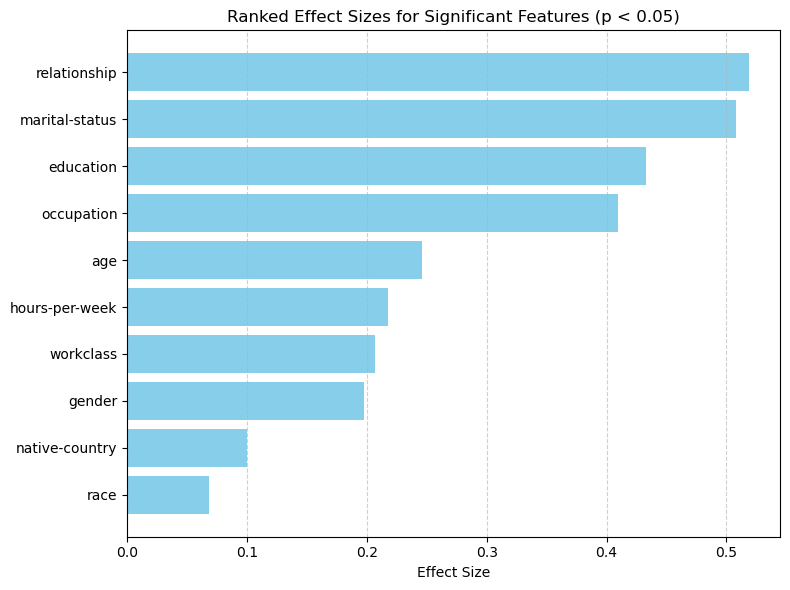

In [153]:
plt.figure(figsize=(8, 6))
plt.barh(eff_df['Feature'], eff_df['effect_size'], color='skyblue')
plt.xlabel("Effect Size")
plt.title("Ranked Effect Sizes for Significant Features (p < 0.05)")
plt.gca().invert_yaxis()  # largest effect at top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [76]:
# RObustness Testing

In [78]:
import pandas as pd
import numpy as np
import itertools
from scipy.stats import pointbiserialr, chi2_contingency, chi2
from sklearn.impute import SimpleImputer
import statsmodels.formula.api as smf
from scipy.special import expit
from IPython.display import display

In [132]:
merged_df = merged_df.rename(columns={'hours-per-week':'hours_per_week'})
merged_df = merged_df.rename(columns={'marital-status':'marital_status'})
merged_df = merged_df.rename(columns={'native-country':'native_country'})

In [134]:
numeric_features = ['age', 'fnlwgt', 'hours_per_week']
categorical_features = ["workclass", "education", "marital_status","occupation","relationship","race","gender","native_country"]
target = 'Predicted_Label'
alpha = 0.05

In [120]:
# RObustness Testing for 50 runs on main effect Gaussian noise + MCAR+ Mean and impute 

In [92]:
def compute_main_importance(df, numeric_features, categorical_features, target, alpha=0.05):
    df = df.copy()
    # Ensure categorical dtype
    for c in categorical_features:
        df[c] = df[c].astype('category')
    # Helper for Cramér’s V
    def cramers_v(tbl):
        chi2_stat = chi2_contingency(tbl, correction=False)[0]
        n = tbl.values.sum()
        r, k = tbl.shape
        return np.sqrt(chi2_stat / (n * (min(r, k) - 1)))
    # Compute per-feature effects
    records = []
    for feat in numeric_features:
        r, p = pointbiserialr(df[feat], df[target])
        effect = abs(r) if p < alpha else 0.0
        records.append({'Feature': feat, 'p_value': round(p, 4), 'Effect': round(effect, 4)})
    for feat in categorical_features:
        tbl = pd.crosstab(df[feat], df[target])
        _, p, _, _ = chi2_contingency(tbl, correction=False)
        effect = cramers_v(tbl) if p < alpha else 0.0
        records.append({'Feature': feat, 'p_value': round(p, 4), 'Effect': round(effect, 4)})
    main_df = pd.DataFrame(records) \
                .sort_values('Effect', ascending=False) \
                .reset_index(drop=True)
    return main_df



In [94]:
def perturb_and_rank_main(df, numeric_features, categorical_features, target, alpha=0.05):
    pert = df.copy()
    # 2.1) Gaussian noise on numeric features
    for c in numeric_features:
        sigma = 0.01 * pert[c].std()
        pert[c] += np.random.normal(0, sigma, size=len(pert))
    # 2.2) MCAR missingness
    frac = np.random.uniform(0.05, 0.10)
    idx_num = pert.sample(frac=frac).index
    pert.loc[idx_num, numeric_features] = np.nan
    idx_cat = pert.sample(frac=frac).index
    pert.loc[idx_cat, categorical_features] = np.nan
    # 2.3) Impute missing
    pert[numeric_features]     = SimpleImputer(strategy='mean').fit_transform(pert[numeric_features])
    pert[categorical_features] = SimpleImputer(strategy='most_frequent').fit_transform(pert[categorical_features])
    # 2.4) Recompute main-effect ranking
    main_df = compute_main_importance(pert, numeric_features, categorical_features, target, alpha)
    return main_df['Feature'].tolist()

# === 3) Evaluate Jaccard@Top-k stability for main effects ===
def evaluate_jaccard_topk_main(df, numeric_features, categorical_features, target,
                               n_runs=50, top_k=5, alpha=0.05):
    # Original top-k
    orig = compute_main_importance(df, numeric_features, categorical_features, target, alpha)['Feature'][:top_k]
    orig_set = set(orig)
    scores = []
    for _ in range(n_runs):
        new = perturb_and_rank_main(df, numeric_features, categorical_features, target, alpha)[:top_k]
        scores.append(len(orig_set & set(new)) / len(orig_set | set(new)))
    return {
        f'avg_jaccard_top_{top_k}': np.mean(scores),
        f'std_jaccard_top_{top_k}': np.std(scores)
    }


In [96]:
main_df = compute_main_importance(merged_df, numeric_features, categorical_features, target, alpha)
print("Main-effect rankings:")
display(main_df)


stability = evaluate_jaccard_topk_main(
    merged_df,
    numeric_features,
    categorical_features,
    target,
    n_runs=50,
    top_k=5,
    alpha=alpha
)
print("Jaccard@5 stability of main-effect ranking:")
print(stability)


Main-effect rankings:


,Feature,p_value,Effect
0,relationship,0.0000,0.5099
1,marital-status,0.0000,0.5038
2,education,0.0000,0.5013
3,occupation,0.0000,0.4640
4,age,0.0000,0.2608
5,hours_per_week,0.0000,0.2233
6,gender,0.0000,0.2174
7,workclass,0.0000,0.2080
8,native-country,0.0000,0.1024
9,race,0.0000,0.0868


Jaccard@5 stability of main-effect ranking:
{'avg_jaccard_top_5': 1.0, 'std_jaccard_top_5': 0.0}


In [ ]:
# Robustness Testing on 1 perturbation on main effect Gaussian noise + MCAR+ Mean and impute

In [98]:
import numpy as np
from scipy.stats import pointbiserialr, chi2_contingency
from sklearn.impute import SimpleImputer
from IPython.display import display

# 1) Main‐effect ranking
def compute_main_importance(df, numeric_feats, categorical_feats, target, alpha=0.05):
    df = df.copy()
    for c in categorical_feats:
        df[c] = df[c].astype('category')
    def cramers_v(tbl):
        chi2_stat = chi2_contingency(tbl, correction=False)[0]
        n = tbl.values.sum(); r, k = tbl.shape
        return np.sqrt(chi2_stat / (n * (min(r, k) - 1)))
    rows = []
    for feat in numeric_feats:
        r, p = pointbiserialr(df[feat], df[target])
        eff = abs(r) if p < alpha else 0.0
        rows.append({'Feature': feat, 'p_value': round(p,4), 'Effect': round(eff,4)})
    for feat in categorical_feats:
        tbl = pd.crosstab(df[feat], df[target])
        _, p, _, _ = chi2_contingency(tbl, correction=False)
        eff = cramers_v(tbl) if p < alpha else 0.0
        rows.append({'Feature': feat, 'p_value': round(p,4), 'Effect': round(eff,4)})
    return pd.DataFrame(rows).sort_values('Effect', ascending=False).reset_index(drop=True)

# 2) Single‐run Jaccard@Top-5
def compute_single_jaccard_top5(df, num_feats, cat_feats, target, alpha=0.05):
    orig = compute_main_importance(df, num_feats, cat_feats, target, alpha)['Feature'][:5].tolist()
    pert = df.copy()
    # noise + MCAR
    for c in num_feats:
        pert[c] += np.random.normal(0, 0.01*pert[c].std(), size=len(pert))
    frac = np.random.uniform(0.05,0.10)
    idx = pert.sample(frac=frac).index
    pert.loc[idx, num_feats]     = np.nan
    idx = pert.sample(frac=frac).index
    pert.loc[idx, cat_feats]     = np.nan
    pert[num_feats] = SimpleImputer(strategy='mean').fit_transform(pert[num_feats])
    pert[cat_feats] = SimpleImputer(strategy='most_frequent').fit_transform(pert[cat_feats])
    new = compute_main_importance(pert, num_feats, cat_feats, target, alpha)['Feature'][:5].tolist()

    j = len(set(orig)&set(new))/len(set(orig)|set(new))
    return j, orig, new

# === RUN THIS AFTER merged_df IS DEFINED ===
numeric_features = ['age', 'fnlwgt', 'hours_per_week']
categorical_features = ["workclass", "education", "marital-status","occupation","relationship","race","gender","native-country"]
target = 'Predicted_Label'
alpha = 0.05

# show main‐effect ranking
main_df = compute_main_importance(merged_df, numeric_features, categorical_features, target, alpha)
display(main_df)

# compute one‐off Jaccard@5
j, orig_top5, pert_top5 = compute_single_jaccard_top5(
    merged_df, numeric_features, categorical_features, target, alpha
)
print("Original Top-5:", orig_top5)
print("Perturbed Top-5:", pert_top5)
print(f"Jaccard@Top-5 = {j:.2f}")


,Feature,p_value,Effect
0,relationship,0.0000,0.5099
1,marital-status,0.0000,0.5038
2,education,0.0000,0.5013
3,occupation,0.0000,0.4640
4,age,0.0000,0.2608
5,hours_per_week,0.0000,0.2233
6,gender,0.0000,0.2174
7,workclass,0.0000,0.2080
8,native-country,0.0000,0.1024
9,race,0.0000,0.0868


Original Top-5: ['relationship', 'marital-status', 'education', 'occupation', 'age']
Perturbed Top-5: ['relationship', 'education', 'marital-status', 'occupation', 'age']
Jaccard@Top-5 = 1.00


In [100]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr, chi2_contingency
from sklearn.impute import SimpleImputer
from IPython.display import display

# === 1) Compute main‐effect importance only ===
def compute_main_importance(df, numeric_features, categorical_features, target, alpha=0.05):
    df = df.copy()
    # Ensure categorical dtype
    for c in categorical_features:
        df[c] = df[c].astype('category')
    # Helper for Cramér’s V
    def cramers_v(tbl):
        chi2_stat = chi2_contingency(tbl, correction=False)[0]
        n = tbl.values.sum()
        r, k = tbl.shape
        return np.sqrt(chi2_stat / (n * (min(r, k) - 1)))
    rows = []
    # Numeric features: point‐biserial
    for feat in numeric_features:
        r, p = pointbiserialr(df[feat], df[target])
        eff = abs(r) if p < alpha else 0.0
        rows.append({'Feature': feat, 'p_value': round(p,4), 'Effect': round(eff,4)})
    # Categorical features: χ² + Cramér’s V
    for feat in categorical_features:
        tbl = pd.crosstab(df[feat], df[target])
        _, p, _, _ = chi2_contingency(tbl, correction=False)
        eff = cramers_v(tbl) if p < alpha else 0.0
        rows.append({'Feature': feat, 'p_value': round(p,4), 'Effect': round(eff,4)})
    main_df = pd.DataFrame(rows).sort_values('Effect', ascending=False).reset_index(drop=True)
    return main_df

# === 2) Perturbation + re‐ranking for main effects with categorical noise ===
def perturb_and_rank_main(df, numeric_features, categorical_features, target,
                          alpha=0.05, cat_noise_frac=0.05):
    pert = df.copy()
    # 2.1) Gaussian noise on numeric features
    for c in numeric_features:
        sigma = 0.01 * pert[c].std()
        pert[c] += np.random.normal(0, sigma, size=len(pert))
    # 2.2) Introduce mis‐labelling noise in categorical features
    for c in categorical_features:
        mask = np.random.rand(len(pert)) < cat_noise_frac
        if mask.any():
            levels = pert[c].dropna().unique()
            pert.loc[mask, c] = np.random.choice(levels, size=mask.sum())
    # 2.3) MCAR missingness on all features
    frac = np.random.uniform(0.05, 0.10)
    idx = pert.sample(frac=frac).index
    pert.loc[idx, numeric_features]     = np.nan
    idx = pert.sample(frac=frac).index
    pert.loc[idx, categorical_features] = np.nan
    # 2.4) Impute missing: mean for numeric, mode for categorical
    pert[numeric_features]     = SimpleImputer(strategy='mean').fit_transform(pert[numeric_features])
    pert[categorical_features] = SimpleImputer(strategy='most_frequent').fit_transform(pert[categorical_features])
    # 2.5) Recompute main‐effect ranking
    return compute_main_importance(pert, numeric_features, categorical_features, target, alpha)['Feature'].tolist()

# === 3) Evaluate Jaccard@Top-k stability for main effects ===
def evaluate_jaccard_topk_main(df, numeric_features, categorical_features, target,
                               n_runs=50, top_k=5, alpha=0.05, cat_noise_frac=0.05):
    orig = compute_main_importance(df, numeric_features, categorical_features, target, alpha)['Feature'][:top_k]
    orig_set = set(orig)
    scores = []
    for _ in range(n_runs):
        new = perturb_and_rank_main(
            df, numeric_features, categorical_features, target,
            alpha, cat_noise_frac
        )[:top_k]
        scores.append(len(orig_set & set(new)) / len(orig_set | set(new)))
    return {
        f'avg_jaccard_top_{top_k}': np.mean(scores),
        f'std_jaccard_top_{top_k}': np.std(scores)
    }

# === 4) Usage Example ===
# Replace `df` below with your DataFrame (must contain features + target column):
# df = merged_df
# numeric_features = ['Credit_History','Income_Level','Loan_Amount','Zip_Code','Education_Level']
# categorical_features = ['Some_Cat_Col1','Some_Cat_Col2']  # list your categorical columns here
# target = 'Predicted_Label'
# alpha = 0.05

# 4a) Compute main‐effect ranking
main_df = compute_main_importance(merged_df, numeric_features, categorical_features, target, alpha)
print("Main‐effect ranking:")
display(main_df)

# 4b) Evaluate perturbation stability with categorical noise
stability = evaluate_jaccard_topk_main(
    merged_df, numeric_features, categorical_features, target,
    n_runs=50, top_k=5, alpha=alpha, cat_noise_frac=0.05
)
print("Jaccard@5 stability (main effects with cat noise):")
print(stability)



Main‐effect ranking:


,Feature,p_value,Effect
0,relationship,0.0000,0.5099
1,marital-status,0.0000,0.5038
2,education,0.0000,0.5013
3,occupation,0.0000,0.4640
4,age,0.0000,0.2608
5,hours_per_week,0.0000,0.2233
6,gender,0.0000,0.2174
7,workclass,0.0000,0.2080
8,native-country,0.0000,0.1024
9,race,0.0000,0.0868


Jaccard@5 stability (main effects with cat noise):
{'avg_jaccard_top_5': 1.0, 'std_jaccard_top_5': 0.0}


In [114]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr, chi2_contingency
from sklearn.impute import SimpleImputer

# === 1) Main‐effect ranking only ===
def compute_main_importance(df, numeric_features, categorical_features, target, alpha=0.05):
    df = df.copy()
    for c in categorical_features:
        df[c] = df[c].astype('category')
    def cramers_v(tbl):
        chi2_stat = chi2_contingency(tbl, correction=False)[0]
        n = tbl.values.sum()
        r, k = tbl.shape
        return np.sqrt(chi2_stat / (n * (min(r, k) - 1)))
    rows = []
    # Numeric: point-biserial
    for feat in numeric_features:
        r, p = pointbiserialr(df[feat], df[target])
        eff = abs(r) if p < alpha else 0.0
        rows.append({'Feature': feat, 'p_value': round(p,4), 'Effect': round(eff,4)})
    # Categorical: χ² + Cramér’s V
    for feat in categorical_features:
        tbl = pd.crosstab(df[feat], df[target])
        _, p, _, _ = chi2_contingency(tbl, correction=False)
        eff = cramers_v(tbl) if p < alpha else 0.0
        rows.append({'Feature': feat, 'p_value': round(p,4), 'Effect': round(eff,4)})
    return pd.DataFrame(rows).sort_values('Effect', ascending=False).reset_index(drop=True)

# === 2) Perturbation with Gaussian noise + categorical mis‐labelling ===
def perturb_with_noise(df, numeric_features, categorical_features, 
                       gaussian_frac=0.01, cat_noise_frac=0.05):
    pert = df.copy()
    # Gaussian noise on numerics
    for c in numeric_features:
        sigma = gaussian_frac * pert[c].std()
        pert[c] += np.random.normal(0, sigma, size=len(pert))
    # Mis-label a fraction of categoricals
    for c in categorical_features:
        mask = np.random.rand(len(pert)) < cat_noise_frac
        if mask.any():
            levels = pert[c].dropna().unique()
            pert.loc[mask, c] = np.random.choice(levels, size=mask.sum())
    return pert

# === 3) Single‐run Jaccard@Top-5 (noise-only) ===
def compute_single_jaccard_top5_noise(df, numeric_features, categorical_features,
                                      target, alpha=0.05,
                                      gaussian_frac=0.01, cat_noise_frac=0.05):
    orig = compute_main_importance(df, numeric_features, categorical_features, target, alpha)['Feature'][:5].tolist()
    pert = perturb_with_noise(df, numeric_features, categorical_features, gaussian_frac, cat_noise_frac)
    new = compute_main_importance(pert, numeric_features, categorical_features, target, alpha)['Feature'][:5].tolist()
    overlap = len(set(orig) & set(new))
    union   = len(set(orig) | set(new))
    jaccard = overlap / union if union else 0.0
    return jaccard, orig, new

# === 4) Average Jaccard@Top-5 over N runs (noise-only) ===
def evaluate_jaccard_topk_noise(df, numeric_features, categorical_features, target,
                                n_runs=50, top_k=5, alpha=0.05,
                                gaussian_frac=0.01, cat_noise_frac=0.05):
    orig = compute_main_importance(df, numeric_features, categorical_features, target, alpha)['Feature'][:top_k].tolist()
    orig_set = set(orig)
    scores = []
    for _ in range(n_runs):
        pert = perturb_with_noise(df, numeric_features, categorical_features, gaussian_frac, cat_noise_frac)
        new = compute_main_importance(pert, numeric_features, categorical_features, target, alpha)['Feature'][:top_k].tolist()
        scores.append(len(orig_set & set(new)) / len(orig_set | set(new)) if orig_set else 0.0)
    return {
        f'avg_jaccard_top_{top_k}': np.mean(scores),
        f'std_jaccard_top_{top_k}': np.std(scores)
    }

# === 5) Usage Example ===
# Replace df with your DataFrame

# Single-run Jaccard@5
j, orig5, new5 = compute_single_jaccard_top5_noise(
    merged_df, numeric_features, categorical_features, target, alpha,
    gaussian_frac=0.01, cat_noise_frac=0.05
)
print("Original Top-5:", orig5)
print("Noisy Top-5:   ", new5)
print(f"Jaccard@Top-5 (single run) = {j:.2f}")

# Average over 50 runs
stability = evaluate_jaccard_topk_noise(
    merged_df, numeric_features, categorical_features, target,
    n_runs=50, top_k=5, alpha=alpha,
    gaussian_frac=0.01, cat_noise_frac=0.05
)
print("\nNoise-only stability:", stability)


Original Top-5: ['relationship', 'marital-status', 'education', 'occupation', 'age']
Noisy Top-5:    ['relationship', 'marital-status', 'education', 'occupation', 'age']
Jaccard@Top-5 (single run) = 1.00

Noise-only stability: {'avg_jaccard_top_5': 1.0, 'std_jaccard_top_5': 0.0}


In [139]:
import os
save_dir = r"/Users/arsh/real_STAT"           # ← Windows example
# save_dir = "/Users/alice/Pictures/MyPlots"            # ← macOS/Linux example

# 2) Make sure it exists
os.makedirs(save_dir, exist_ok=True)

# 3) Build the full filename
filename = "RNN_Adult.jpg"
output_path = os.path.join(save_dir, filename)

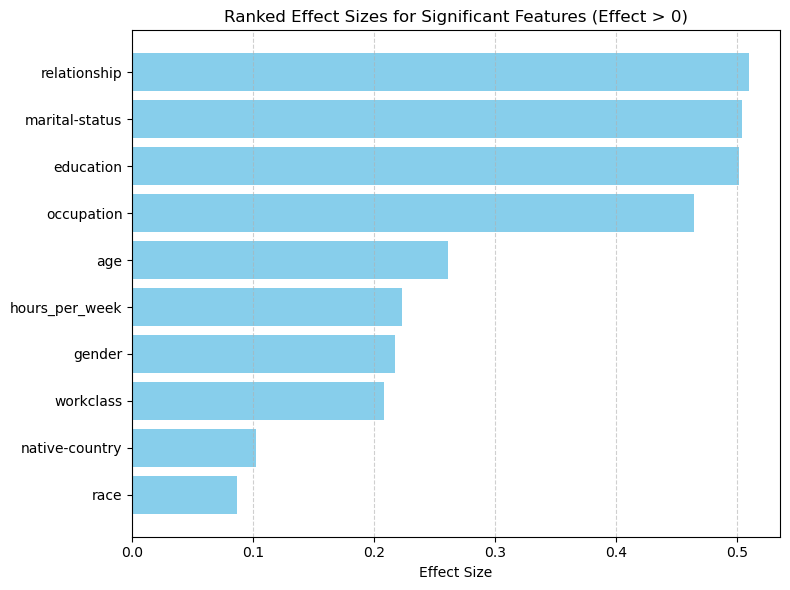

Saved plot to: /Users/arsh/real_STAT/RNN_Adult.jpg


In [141]:
import matplotlib.pyplot as plt

plot_df = main_df[main_df['Effect'] > 0]

plt.figure(figsize=(8, 6))
plt.barh(plot_df['Feature'], plot_df['Effect'], color='skyblue')
plt.xlabel("Effect Size")
plt.title("Ranked Effect Sizes for Significant Features (Effect > 0)")
plt.gca().invert_yaxis()  # largest effect at top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig(output_path, dpi=300)
plt.show()

print("Saved plot to:", os.path.abspath(output_path))